In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [33]:
df = sns.load_dataset('flights')

In [34]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [36]:
df['date'] = "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)

In [37]:
df.head()

,year,month,passengers,date
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [38]:
df['date'] = pd.to_datetime(df['date'])

In [39]:
df.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [40]:
df = df.set_index('date')

In [41]:
df.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


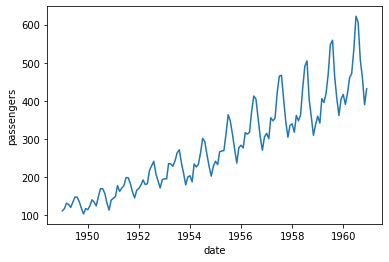

In [42]:
sns.lineplot(data = df,x = df.index,y = df.passengers)

In [43]:
df.drop(['year','month'],axis=1)

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Now, we need to check whether the dataset is stationary or not....
First method, **Rolling method**

In [44]:
df['rollmean'] = df.passengers.rolling(window = 12).mean()
df['rollstd'] = df.passengers.rolling(window = 12).std()

In [45]:
df.head()

,year,month,passengers,rollmean,rollstd
date,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


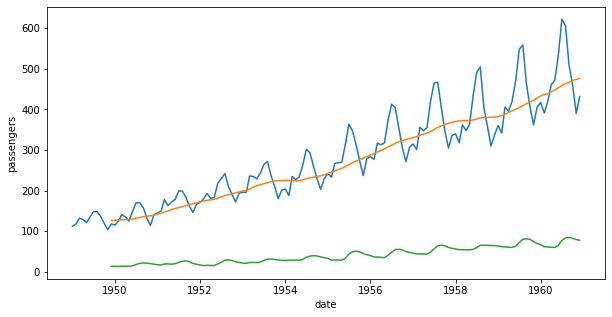

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df,x = df.index,y = df.passengers)
sns.lineplot(data = df,x = df.index,y = df.rollmean)
sns.lineplot(data = df,x = df.index,y = df.rollstd)


Here we can see standard deviation is stationary but mean is not.


Second method, we will do **ADF** test for it.
**ADF(Augmented Dickey-Fuller test)**:-
Dataset is stationary if and only if it follows 

**Test statstics < Critical value**, otherwise it won't be stationary

In [51]:
from statsmodels.tsa.stattools import adfuller

In [52]:
adtest = adfuller(df['passengers'],autolag='AIC')

In [53]:
adtest

(0.8153688792060528,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In the above **adtest**, first 4 index are ["test statstic", "p-value", "#lags used", "# obervation used"]

In [55]:
#stats = 
stats = pd.Series(adtest[:4],index =  ["test statstic", "p-value", "#lags used", "# obervation used"])

In [56]:
stats

test statstic          0.815369
p-value                0.991880
#lags used            13.000000
# obervation used    130.000000
dtype: float64

In [59]:
for key, value in adtest[4].items():
  print("Critical Value",key,":",value)

Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


In [72]:
def test_stationary(data, var):
  data['rollmean'] = data[var].rolling(window = 12).mean()
  data['rollstd'] = data[var].rolling(window = 12).std()
  
  
  from statsmodels.tsa.stattools import adfuller
  adtest = adfuller(data[var],autolag='AIC')
  stats = pd.Series(adtest[:4],index =  ["test statstic", "p-value", "#lags used", "# obervation used"])
  print("stats: ",stats)

  for key, value in adtest[4].items():
    print("Critical Value",key,":",value)

  sns.lineplot(data = data,x = data.index,y = var)
  sns.lineplot(data = data,x = data.index,y = 'rollmean')
  sns.lineplot(data = data,x = data.index,y = 'rollstd')

stats:  test statstic          0.815369
p-value                0.991880
#lags used            13.000000
# obervation used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598
None


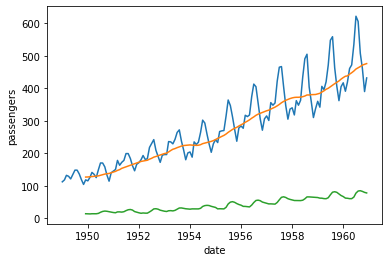

In [73]:
print(test_stationary(df,'passengers'))

As per the above result we found that **Test Statstics** is not less than the **Critical Value** so the dataset is stationary.
Now, firstly we need to convert the dataset into stationary\

# Mainly there are three types of method for making the datasets the stationary:
1.   Time Shift
2.   Log
3.   Square Root, Cube Root...

#Note:- Most common method is Time shift

Shift Method

In [63]:
air_df = df[['passengers']]
air_df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [65]:
#shift
air_df['shift'] = air_df['passengers'].shift(1)
air_df.head()

<ipython-input-65-93fb0d408a71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df['passengers'].shift(1)


,passengers,shift
date,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [66]:
air_df['shift_diff'] = air_df['passengers'] - air_df['shift']
air_df.head()

<ipython-input-66-34b0417b032f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift_diff'] = air_df['passengers'] - air_df['shift']


,passengers,shift,shift_diff
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-72-c590509c041f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollmean'] = data[var].rolling(window = 12).mean()
<ipython-input-72-c590509c041f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollstd'] = data[var].rolling(window = 12).std()


stats:  test statstic         -2.719697
p-value                0.070691
#lags used            12.000000
# obervation used    120.000000
dtype: float64
Critical Value 1% : -3.486055829282407
Critical Value 5% : -2.8859430324074076
Critical Value 10% : -2.5797850694444446


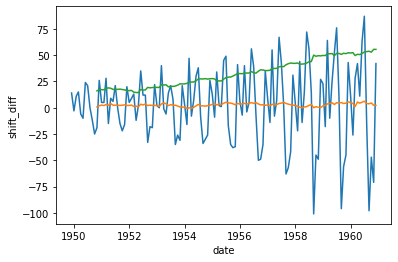

In [74]:
test_stationary(air_df.dropna(),"shift_diff")

Log Method

In [75]:
log_df = df[['passengers']]
log_df.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [76]:
log_df['passengers_log'] = np.log(log_df['passengers'])
log_df.head()

<ipython-input-76-8e1688086cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['passengers_log'] = np.log(log_df['passengers'])


,passengers,passengers_log
date,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


stats:  test statstic         -1.717017
p-value                0.422367
#lags used            13.000000
# obervation used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


<ipython-input-72-c590509c041f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollmean'] = data[var].rolling(window = 12).mean()
<ipython-input-72-c590509c041f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollstd'] = data[var].rolling(window = 12).std()


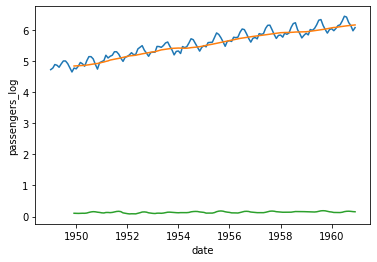

In [78]:
test_stationary(log_df,"passengers_log")

SqureRoot Method

In [79]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])
sqrt_df.head()

<ipython-input-79-4b4cdce957f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])


,passengers,sqrt
date,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<ipython-input-72-c590509c041f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollmean'] = data[var].rolling(window = 12).mean()
<ipython-input-72-c590509c041f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollstd'] = data[var].rolling(window = 12).std()


stats:  test statstic         -0.345854
p-value                0.918754
#lags used            13.000000
# obervation used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


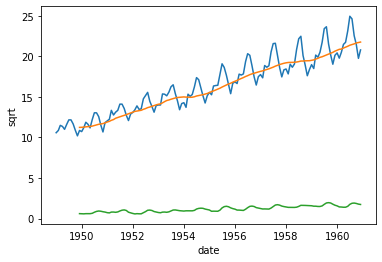

In [80]:
test_stationary(sqrt_df,"sqrt")

CubeRoot Method

In [81]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

<ipython-input-81-179395173d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
date,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


<ipython-input-72-c590509c041f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollmean'] = data[var].rolling(window = 12).mean()
<ipython-input-72-c590509c041f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollstd'] = data[var].rolling(window = 12).std()


stats:  test statstic         -0.810035
p-value                0.816157
#lags used            13.000000
# obervation used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


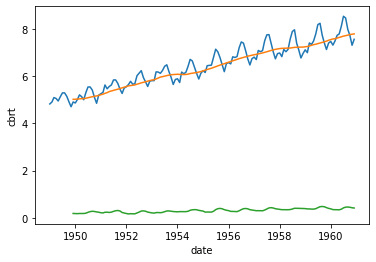

In [82]:
test_stationary(cbrt_df,'cbrt')

Log & SquareRoot Combine Method

In [83]:
#logsqrt
log_df.head()

,passengers,passengers_log,rollmean,rollstd
date,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,NaN,NaN
1949-03-01,132,4.882802,NaN,NaN
1949-04-01,129,4.859812,NaN,NaN
1949-05-01,121,4.795791,NaN,NaN


In [84]:
log_df['logsqrt'] = np.sqrt(log_df['passengers_log'])
log_df.head()

,passengers,passengers_log,rollmean,rollstd,logsqrt
date,,,,,
1949-01-01,112,4.718499,NaN,NaN,2.172211
1949-02-01,118,4.770685,NaN,NaN,2.184190
1949-03-01,132,4.882802,NaN,NaN,2.209706
1949-04-01,129,4.859812,NaN,NaN,2.204498
1949-05-01,121,4.795791,NaN,NaN,2.189929


stats:  test statstic         -1.942528
p-value                0.312326
#lags used            13.000000
# obervation used    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


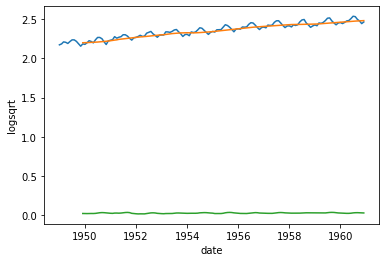

In [85]:
test_stationary(log_df,'logsqrt')

Log, SquareRoot & Shift Combine Method

In [86]:
#logsqrtshift
log_df['logsqrtshift']  = log_df['logsqrt'] - log_df['logsqrt'].shift(1)
log_df.head()

,passengers,passengers_log,rollmean,rollstd,logsqrt,logsqrtshift
date,,,,,,
1949-01-01,112,4.718499,NaN,NaN,2.172211,NaN
1949-02-01,118,4.770685,NaN,NaN,2.184190,0.011979
1949-03-01,132,4.882802,NaN,NaN,2.209706,0.025517
1949-04-01,129,4.859812,NaN,NaN,2.204498,-0.005208
1949-05-01,121,4.795791,NaN,NaN,2.189929,-0.014569


<ipython-input-72-c590509c041f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollmean'] = data[var].rolling(window = 12).mean()
<ipython-input-72-c590509c041f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rollstd'] = data[var].rolling(window = 12).std()


stats:  test statstic         -3.071912
p-value                0.028703
#lags used            13.000000
# obervation used    118.000000
dtype: float64
Critical Value 1% : -3.4870216863700767
Critical Value 5% : -2.8863625166643136
Critical Value 10% : -2.580009026141913


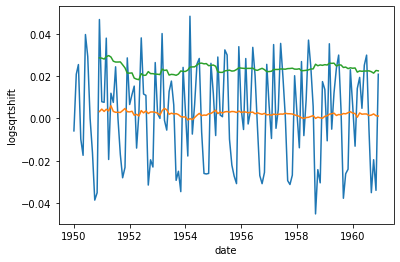

In [88]:
test_stationary(log_df.dropna(),"logsqrtshift")

From the above result, **LogSqrtShift** technique, we are getting better output.
Note:- See the [**output sheet**](https://docs.google.com/spreadsheets/d/1F1XlMrrbnDbgRiyY6XUhlzS_DmNLgF9kp40kxZRgDbs/edit#gid=0) for reference.

# Next-2

In [89]:
air_p = df[['passengers']].copy(deep=True)
air_p['firstdiff'] = air_p['passengers'].diff()

In [90]:
air_p

,passengers,firstdiff
date,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [91]:
#for seasonallity
air_p['yearly_diff'] = air_p['passengers'].diff(12)
air_p.head()

,passengers,firstdiff,yearly_diff
date,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


# **ARIMA**
This model is building with three different models(p,d,q)


1.   **AR** :- Auto Regressor(p)
2.   **I** :- Integrated(d)
3.   **MA** :- Moving Average(q)



In [93]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

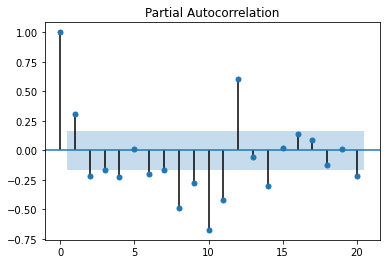

In [100]:
plot_pacf(air_p['firstdiff'].dropna(),lags=20);

so, p = 1

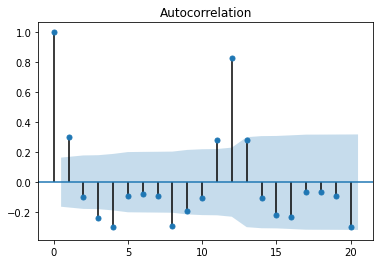

In [101]:
plot_acf(air_p['firstdiff'].dropna(),lags=20);

q = 3
and we already know d = 1

Split the dataset for training

In [103]:
#Split the data into 7:3 ratio
train = air_p[:round(len(air_p)*70/100)]
test = air_p[round(len(air_p)*70/100):]
test.head()

,passengers,firstdiff,yearly_diff
date,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [104]:
model = ARIMA(air_p['passengers'], order = (1,1,3))
arima = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [105]:
prediction = arima.predict(start=test.index[0],end=test.index[-1])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [106]:
air_p['arima_pred'] = prediction
air_p.tail()

,passengers,firstdiff,yearly_diff,arima_pred
date,,,,
1960-08-01,606,-16.0,47.0,-21.444906
1960-09-01,508,-98.0,45.0,-58.355838
1960-10-01,461,-47.0,54.0,-45.452836
1960-11-01,390,-71.0,28.0,-2.176477
1960-12-01,432,42.0,27.0,0.492997


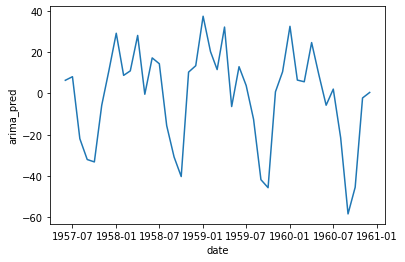

In [109]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'arima_pred')

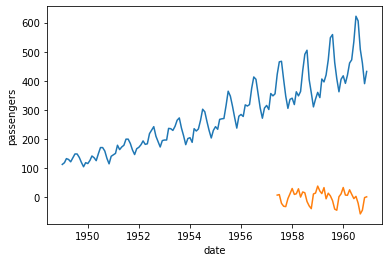

In [110]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'passengers')
sns.lineplot(data=air_p,x = air_p.index,y = 'arima_pred')

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
mean_squared_error(test['passengers'],prediction)

186925.13074238927

In [113]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

432.3483904704507

So, ARIMA is not working perfectly for this dataset

Now, we will apllied SARIMAX

In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

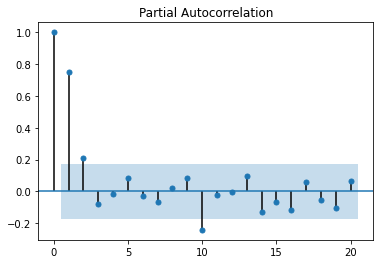

In [123]:
plot_pacf(air_p['yearly_diff'].dropna(),lags=20);

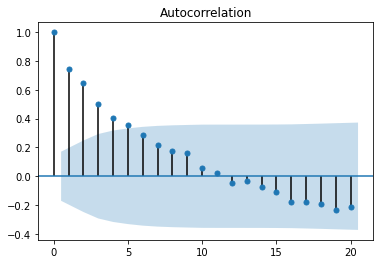

In [124]:
plot_acf(air_p['yearly_diff'].dropna(),lags=20);

So, for seasonlity
p=2, q =2, d =1

In [125]:
sarimax_model = SARIMAX(air_p['passengers'], order = (1,1,3),seasonal_order=(2,1,2,12))
sarimax = sarimax_model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [126]:
sarimax_prediction = sarimax.predict(start=test.index[0],end=test.index[-1])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [127]:
air_p['sarimax_pred'] = sarimax_prediction
air_p.tail()

,passengers,firstdiff,yearly_diff,arima_pred,sarimax_pred
date,,,,,
1960-08-01,606,-16.0,47.0,-21.444906,621.462315
1960-09-01,508,-98.0,45.0,-58.355838,513.105672
1960-10-01,461,-47.0,54.0,-45.452836,447.153882
1960-11-01,390,-71.0,28.0,-2.176477,407.155334
1960-12-01,432,42.0,27.0,0.492997,440.364786


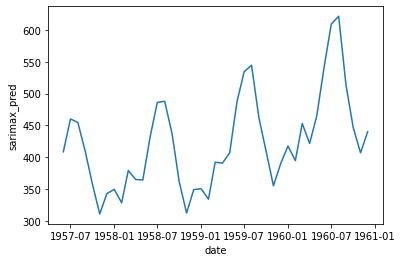

In [128]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'sarimax_pred')

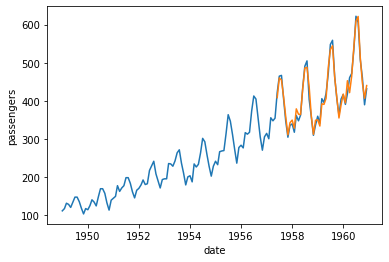

In [129]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'passengers')
sns.lineplot(data=air_p,x = air_p.index,y = 'sarimax_pred')

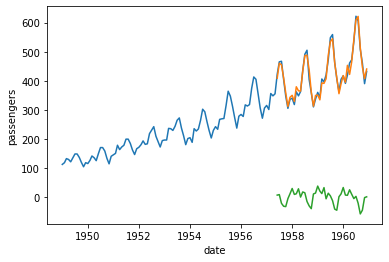

In [132]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'passengers')
sns.lineplot(data=air_p,x = air_p.index,y = 'sarimax_pred')
sns.lineplot(data=air_p,x = air_p.index,y = 'arima_pred')

In [130]:
mean_squared_error(test['passengers'],sarimax_prediction)

191.43169777977295

In [131]:
np.sqrt(mean_squared_error(test['passengers'],sarimax_prediction))

13.835884423475536

In [137]:
forcasts = pd.DataFrame(pd.date_range(start = '1961-01-01',end = '1962-12-01',freq = 'MS'),columns = ['forcast_date'])
forcasts.set_index(['forcast_date'],inplace = True)

In [138]:
forcasts.head()

""
forcast_date
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


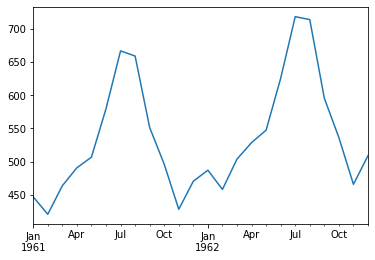

In [139]:
sarimax.predict(start = forcasts.index[0],end = forcasts.index[-1]).plot()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


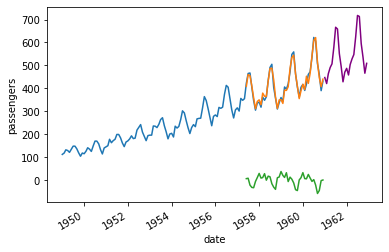

In [142]:
air_p.dropna()
sns.lineplot(data=air_p,x = air_p.index,y = 'passengers')
sns.lineplot(data=air_p,x = air_p.index,y = 'sarimax_pred')
sns.lineplot(data=air_p,x = air_p.index,y = 'arima_pred')
sarimax.predict(start = forcasts.index[0],end = forcasts.index[-1]).plot(color = 'purple')